# **1. Regresión Logística sin Regularización**

In [ ]:
import pandas as pd #pd solo es el alias
import os #operating system
print("Current Working Directory " , os.getcwd())
data = pd.read_csv('ex2data1.txt')
data.head() #muestra los primeros 5 ejemplos


Current Working Directory  /content


,exam1_score,exam2_score,decision
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Extraemos las columnas de características y guardamos en la variable `X`

In [ ]:
X = data[['exam1_score','exam2_score']]
X.head()

,exam1_score,exam2_score
0,34.623660,78.024693
1,30.286711,43.894998
2,35.847409,72.902198
3,60.182599,86.308552
4,79.032736,75.344376


In [ ]:
y = data[['decision']]
y.head()
#type(y.shape)
#y.values.ravel()
#type(y.shape)

,decision
0,0
1,0
2,0
3,1
4,1


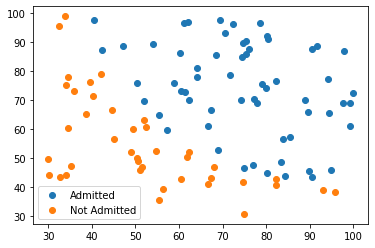

In [ ]:
import matplotlib.pyplot as plt

X_admitted = X[y['decision']==1] 
plt.scatter(X_admitted['exam1_score'], X_admitted['exam2_score'], label='Admitted')

X_Not_admitted = X[y['decision']==0] 
plt.scatter(X_Not_admitted['exam1_score'], X_Not_admitted['exam2_score'], label='Not Admitted')
plt.legend()

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np # numpy~Matlab
classifier = LogisticRegression(penalty='none').fit(X, y) #penalty='none' -> sin regularización , lambda =0, representación+eval+opt
xnew = np.array([[45, 85], [50, 99]])
proba = classifier.predict_proba(xnew)
print(proba)

[[0.22370987 0.77629013]
 [0.00608428 0.99391572]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
accuracy = classifier.score(X,y) #exactitud en el conjunto de entrenamiento
print(accuracy)

0.89


Parámetros theta sin theta_0(bias):
[[0.20623222 0.20147191]]
bias (theta_0):
[-25.16138567]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


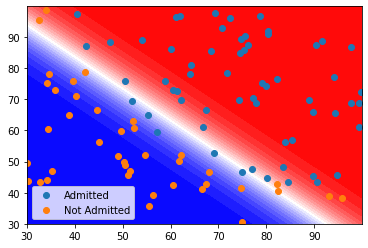

In [ ]:
theta = classifier.coef_ #theta_1, theta_2, etc..
bias = classifier.intercept_ #bias-> theta_0
print('Parámetros theta sin theta_0(bias):')
print(theta) #parámetros theta (sin el bias)
print('bias (theta_0):')
print(bias)

import matplotlib.pyplot as plt

xx, yy = np.mgrid[30:100:.1, 30:100:.1]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = classifier.predict_proba(grid)[:, 1].reshape(xx.shape)
plt.contourf(xx, yy, probs, 25, cmap="bwr",
                      vmin=0, vmax=1)
X_admitted = X[y['decision']==1] 
plt.scatter(X_admitted['exam1_score'], X_admitted['exam2_score'], label='Admitted')
X_Not_admitted = X[y['decision']==0] 
plt.scatter(X_Not_admitted['exam1_score'], X_Not_admitted['exam2_score'], label='Not Admitted')
plt.legend()

# **2. Regresión Logística Regularizada**


In [ ]:
import pandas as pd
import os
print("Current Working Directory " , os. getcwd())
data = pd.read_csv('ex2data2.txt')
print(data.shape)
data.head() #muestra los primeros 5 ejemplos


Current Working Directory  /content
(118, 3)


,test1,test2,QA
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [ ]:
X = data[['test1','test2']]
print(X.shape)
X.head()

(118, 2)


,test1,test2
0,0.051267,0.69956
1,-0.092742,0.68494
2,-0.213710,0.69225
3,-0.375000,0.50219
4,-0.513250,0.46564


In [ ]:
y = data[['QA']]
y.head()

,QA
0,1
1,1
2,1
3,1
4,1


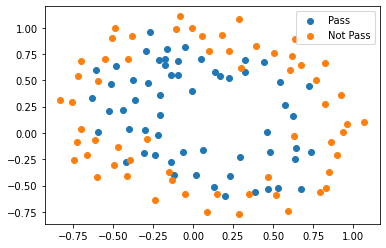

In [ ]:
import matplotlib.pyplot as plt

X_admitted = X[y['QA']==1] 
plt.scatter(X_admitted['test1'], X_admitted['test2'], label='Pass')

X_Not_admitted = X[y['QA']==0] 
plt.scatter(X_Not_admitted['test1'], X_Not_admitted['test2'], label='Not Pass')
plt.legend()

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=15) # x1*x2, x1*x2^2, ....x1^14*x2, degree es un hyperparameter
X_pol = poly.fit_transform(X)
print(np.shape(X_pol))


(118, 136)


In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np
lambda_value = 1 #hyperparameter 
classifier = LogisticRegression(penalty='l2', C=1/lambda_value, max_iter=10000).fit(X_pol, y) #spenalty='l2' -> con regularización 
xnew = np.array([[-0.75, -0.75], [0.25, 0.25]])
classifier.predict_proba(poly.transform(xnew))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


array([[0.96761381, 0.03238619],
       [0.19633991, 0.80366009]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = classifier.score(X_pol,y) #umbral de 0.5 50%
print(accuracy)

proba = classifier.predict_proba(poly.transform(X))
ypred = proba[:,1]>0.5 #umbral 
print(accuracy_score(y,ypred))

0.8305084745762712
0.8305084745762712


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


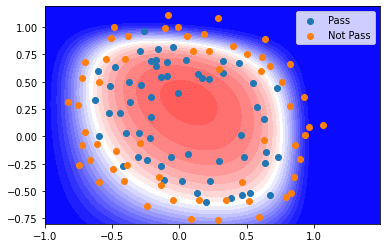

In [ ]:
import matplotlib.pyplot as plt

xx, yy = np.mgrid[-1:1.5:.01, -0.8:1.2:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = classifier.predict_proba(poly.transform(grid))[:, 1].reshape(xx.shape)
plt.contourf(xx, yy, probs, 25, cmap="bwr",
                      vmin=0, vmax=1)
X_admitted = X[y['QA']==1] 
plt.scatter(X_admitted['test1'], X_admitted['test2'], label='Pass')
X_Not_admitted = X[y['QA']==0] 
plt.scatter(X_Not_admitted['test1'], X_Not_admitted['test2'], label='Not Pass')
plt.legend()



## **Actividad 1**

En esta parte del ejercicio, podrá probar diferentes parámetros de regularización para el conjunto de datos para comprender cómo la regularización evita el sobreajuste.

Observe los cambios en la frontera de decisión a medida que varía λ. Analice
al menos los siguientes valores del parámetro de regularización, i.e., λ = 0.001, 
λ =1, λ = 10, λ = 100 y discuta sus resultados en términos de la frontera de decisión obtenida y la exactitud en el conjunto de entrenamiento.
Obtenga y discuta los resultados del análisis pedido.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


Lambda=  0.001
Accuracy:  0.8813559322033898


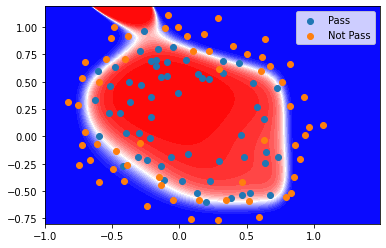

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


Lambda=  1
Accuracy:  0.8305084745762712


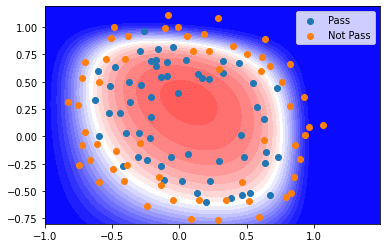

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


Lambda=  10
Accuracy:  0.7203389830508474


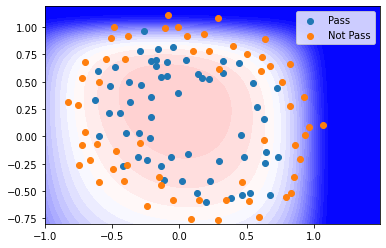

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


Lambda=  100
Accuracy:  0.6610169491525424


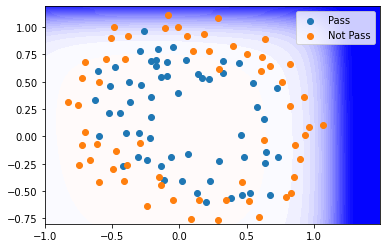

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


Lambda=  0.5
Accuracy:  0.8220338983050848


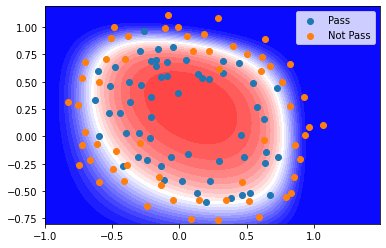

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
lambda_value = (0.001,1,10,100,0.5) #hyperparameter 
for l in lambda_value:
  classifier = LogisticRegression(penalty='l2', C=1/l, max_iter=10000).fit(X_pol, y) #spenalty='l2' -> con regularización 
  xnew = np.array([[-0.75, -0.75], [0.25, 0.25]])
  classifier.predict_proba(poly.transform(xnew))
  xx, yy = np.mgrid[-1:1.5:.01, -0.8:1.2:.01]
  grid = np.c_[xx.ravel(), yy.ravel()]
  probs = classifier.predict_proba(poly.transform(grid))[:, 1].reshape(xx.shape)
  plt.contourf(xx, yy, probs, 25, cmap="bwr",
                        vmin=0, vmax=1)
  X_admitted = X[y['QA']==1] 
  plt.scatter(X_admitted['test1'], X_admitted['test2'], label='Pass')
  X_Not_admitted = X[y['QA']==0] 
  plt.scatter(X_Not_admitted['test1'], X_Not_admitted['test2'], label='Not Pass')
  plt.legend()
  print("Lambda= ",l)
  accuracy = classifier.score(X_pol,y) #umbral de 0.5 50%
  print("Accuracy: ",accuracy)
  plt.show()

# Conclusiones:

podemos ver como en los valores de 10 y 100 se evidencia underfitting mientras que en 0.001 podemos ver overfitting. entre los valores que se nos da para hacer el testing el mas razonable seria 1, pero en mi opinion 0.5 es un mejor valor de lambda ya que la distubicion de probabilidades es mas alta en los bordes, pero en el centro no hay mucha variabiidad, mientra que en lambda=1 siento que hay una variabiidad mas alta en trodo el grafico. Tambien podemos ver como el accuracy es mas altocuando hay mas overfitting, por lo tanto no necesariamente deberiamos aspirar a tener un accuracy muy alto.

# **3. "Churn" en operadoras telefónicas**.


Para esta parte del laboratorio, Vamos a usar el dataset disponible en [link text](https://www.kaggle.com/mnassrib/telecom-churn-datasets)

Este dataset está compuesto de datos de la actividad de clientes de una operadora de telefonía. La columna `Churn` es la etiqueta o salida que se desea predecir. Cuando "Churn" es 1 significa que el cliente cambió de operadora. El objetivo es predecir si un cliente cambiará de operadora usando Regresión Logística.

Este dataset contiene dos conjuntos: un conjunto de entrenamiento en el archivo `churn-bigml-80.csv` y un conjunto de test en el archivo `churn-bigml-20.csv`

Primero vamos a leer el conjunto de entrenamiento y limpiarlo para obtener 18 características. También vamos a crear características polinómicas hasta orden 3 y posteriormente normalizaremos los datos. La normalización es necesaria porque las escalas de las características polinómicas es mucho mayor que las características originales.

Luego de este proceso, nuestro conjunto de entrenamiento tendrá 2666 ejemplos con 1330 características. Recuerde que la salida es la columna `Churn`.

In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
DataSet = pd.read_csv('churn-bigml-80.csv')

#limpieza de los datos
DataSet = DataSet.drop(columns=["State"])
DataSet['Churn'] = DataSet['Churn'].replace([False],0)
DataSet['Churn'] = DataSet['Churn'].replace([True],1)
DataSet['International plan'] = DataSet['International plan'].map({'Yes': 1, 'No': 0})
DataSet['Voice mail plan'] = DataSet['Voice mail plan'].map({'Yes': 1, 'No': 0})

Xtrain = DataSet.drop(columns=['Churn'])
ytrain = DataSet['Churn']

print("Tamaño del dataset de entrenamiento original", Xtrain.shape)

poly = PolynomialFeatures(degree=3)
Xtrain_pol = poly.fit_transform(Xtrain)

scaler = preprocessing.StandardScaler().fit(Xtrain_pol) #media cero, varianza 1
Xtrain_pol_norm = scaler.transform(Xtrain_pol)

print("Tamaño del dataset de entrenamiento con características polinómicas", Xtrain_pol.shape)

Tamaño del dataset de entrenamiento original (2666, 18)
Tamaño del dataset de entrenamiento con características polinómicas (2666, 1330)


A continuación leeremos el conjunto de test y aplicaremos las mismas transformaciones usadas en el conjunto de entrenamiento: creación de características polinómicas y normalización.

In [ ]:
Dataset_test = pd.read_csv('churn-bigml-20.csv')
Dataset_test = Dataset_test.drop(columns=["State"])
Dataset_test['Churn'] = Dataset_test['Churn'].replace([False],0)
Dataset_test['Churn'] = Dataset_test['Churn'].replace([True],1)
Dataset_test['International plan'] = Dataset_test['International plan'].map({'Yes': 1, 'No': 0})
Dataset_test['Voice mail plan'] = Dataset_test['Voice mail plan'].map({'Yes': 1, 'No': 0})

Xtest = Dataset_test.drop(columns=['Churn'])
ytest = Dataset_test['Churn']

Xtest_pol_norm = scaler.transform(poly.transform(Xtest))
print ("Tamaño del dataset de test con características polinómicas", Xtest_pol_norm.shape)

Tamaño del dataset de test con características polinómicas (667, 1330)


## **Actividad 2**

A partir del siguiente código base, cree un clasificador binario con regresión logística sin regularización. Reporte el valor de la exactitud en el conjunto de test (ver variable `accuracy_test`). Para asegurar que su clasificador tenga convergencia use `max_iter=10000` en los parámetros de la función de regresión logística,


In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np
#entreno en churn-bigml-80.csv, pruebo (test) churn-bigml-20.csv
classifier = LogisticRegression(penalty='none',max_iter=10000).fit(Xtrain_pol_norm, ytrain)

accuracy_test = classifier.score(Xtest_pol_norm,ytest)
print("Exactitud en el conjunto de test:", accuracy_test)

Exactitud en el conjunto de test: 0.8620689655172413


## **Actividad 3**

A partir del siguiente código base, cree un clasificador binario con regresión logística con regularización (el factor de regularización es la variable `lambda_value`). Reporte el valor de la exactitud en el conjunto de test (ver variable `accuracy_test`) para los siguientes valores de lambda: 1, 10, 100, 1000, 10000. Para asegurar que su clasificador tenga convergencia use `max_iter=10000` en los parámetros de la función de regresión logística,

In [ ]:
from sklearn.linear_model import LogisticRegression
lambda_value = (1,10,100,1000,10000,0.8) #hyperparameter 
for l in lambda_value:
  classifier = LogisticRegression(penalty='l2', C=1/l, max_iter=10000).fit(Xtrain_pol_norm, ytrain) #spenalty='l2' -> con regularización 

  accuracy_test = classifier.score(Xtest_pol_norm,ytest)
  print("Exactitud en el conjunto de test para lambda= ",l,":", accuracy_test)

Exactitud en el conjunto de test para lambda=  1 : 0.9250374812593704
Exactitud en el conjunto de test para lambda=  10 : 0.9190404797601199
Exactitud en el conjunto de test para lambda=  100 : 0.9130434782608695
Exactitud en el conjunto de test para lambda=  1000 : 0.8920539730134932
Exactitud en el conjunto de test para lambda=  10000 : 0.8650674662668666
Exactitud en el conjunto de test para lambda=  0.8 : 0.9220389805097451


# **Actividad 4**

Cuál fue el mejor clasificador en términos de la exactitud en el conjunto de test? Discuta sus resultados.

-El Mejor clasificador vendria a ser el clasificador con regulacion, en especial con un lambda que sea mayor a 0.8 y menor o igual a 1, porque estos valores nos estarian dando el valor mas alto para la exactitud mas alta en el conjunto de prueba, pero es el mejor solo enfocandonos en terminos de accuracy, para saber cual es el mejor en general tambien deberiamos enfocarnos en el overfitting que puede estar ocurriendo al momento de nosotros tener un accuracy muy alto.

# **4. Conclusiones**
Concluya su trabajo con sus principales observaciones obtenidas de los resultados de sus experimentos.

-lo mas importante que entiendo yo de este laboratorio es la importancia de un buen lambda para controlar el over y under fitting y para la exactitud del conjunto test, tambien en este laboratorio yo pude ver porque no deberiamos aspirar a tener un accuracy muy alto tampoco. Adicionalmente me es interesante la manera tan subjetiva que utilizamos para determinar un lambda apropiado para cada actividad y me da curiosidad si existen herramientas matematicas para determinar el lambda mas apropiado.
